In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/155.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 155.5/155.5 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 6.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.6 MB 8.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/7.6 MB 10.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.6 MB 13.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.6 MB 14.8 MB/s eta 0:00:01
   ------------------------- -------------- 4.8/7.6 MB 17.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.4/7.6 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 19.5 MB/s eta 0:00:00
   ----

In [4]:
pip install pandas

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------- ------------------------ 122.9/341.8 kB 7.5 MB/s eta 0:00:01
     ------------------------------- ------ 286.7/341.8 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.5 MB 6.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.5 MB 6.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.5 MB 10.1 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/10.5 MB 10.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.5 MB 9.6 MB/s eta 0:00:01
   ---

In [8]:
import pyodbc
import pandas as pd
import matplotlib



SERVER = '192.168.3.17'
DATABASE = 'ContosoRetailDW'
USERNAME = 'daiana.figueira'
PASSWORD = '141218Dm'

conect = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD};TrustServerCertificate=yes'

conexao = pyodbc.connect(conect)
print("Conexão bem sucedida")

Conexão bem sucedida


In [9]:
comando_sql = f"SELECT ColorName, UnitPrice FROM DimProduct"
dados = pd.read_sql(comando_sql, conexao)

C:\Users\Daiana Figueira\AppData\Local\Temp\ipykernel_7348\23783658.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql(comando_sql, conexao)


In [10]:
display(dados)

,ColorName,UnitPrice
0,Silver,12.99
1,Blue,12.99
2,White,14.52
3,Silver,21.57
4,Red,21.57
...,...,...
2512,Red,129.99
2513,White,129.99
2514,White,3.35
2515,Black,3.35


In [12]:
dados.groupby ('ColorName').count()

,UnitPrice
ColorName,
Azure,14
Black,602
Blue,197
Brown,77
Gold,50
Green,74
Grey,283
Orange,55
Pink,84


In [14]:
total_produtos_por_cor = dados.groupby ('ColorName').count()

In [15]:
display(total_produtos_por_cor)

,UnitPrice
ColorName,
Azure,14
Black,602
Blue,197
Brown,77
Gold,50
Green,74
Grey,283
Orange,55
Pink,84


<Axes: xlabel='ColorName'>

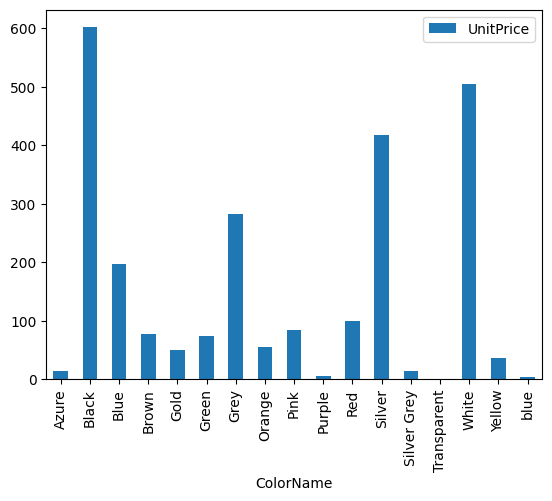

In [16]:
total_produtos_por_cor.plot(kind='bar')